# CycleGAN train

In [41]:
import os
import matplotlib.pyplot as plt

from models.cycleGAN import CycleGAN
from utils.loaders import DataLoader

In [42]:

# run params
SECTION = 'paint'
RUN_ID = '0001'
DATA_NAME = 'apple2orange'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' # 'build' # 

# data

In [43]:
IMAGE_SIZE = 128

In [44]:

data_loader = DataLoader(dataset_name=DATA_NAME, img_res=(IMAGE_SIZE, IMAGE_SIZE))


# architecture

In [45]:
gan = CycleGAN(
    input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
    ,learning_rate = 0.0002
    , buffer_max_length = 50
    , lambda_validation = 1
    , lambda_reconstr = 10
    , lambda_id = 2
    , generator_type = 'unet'
    , gen_n_filters = 32
    , disc_n_filters = 32
    )

if mode == 'build':
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))
    


('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [46]:
gan.g_BA.summary()

Model: "functional_47"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_28 (InputLayer)           [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_122 (Conv2D)             (None, 64, 64, 32)   1568        input_28[0][0]                   
__________________________________________________________________________________________________
instance_normalization_93 (Inst (None, 64, 64, 32)   0           conv2d_122[0][0]                 
__________________________________________________________________________________________________
activation_63 (Activation)      (None, 64, 64, 32)   0           instance_normalization_93[0][0]  
______________________________________________________________________________________

In [47]:
gan.g_AB.summary()

Model: "functional_45"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_27 (InputLayer)           [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_114 (Conv2D)             (None, 64, 64, 32)   1568        input_27[0][0]                   
__________________________________________________________________________________________________
instance_normalization_86 (Inst (None, 64, 64, 32)   0           conv2d_114[0][0]                 
__________________________________________________________________________________________________
activation_56 (Activation)      (None, 64, 64, 32)   0           instance_normalization_86[0][0]  
______________________________________________________________________________________

In [48]:
gan.d_A.summary()

Model: "functional_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 64, 64, 32)        1568      
_________________________________________________________________
leaky_re_lu_32 (LeakyReLU)   (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 32, 32, 64)        32832     
_________________________________________________________________
instance_normalization_80 (I (None, 32, 32, 64)        0         
_________________________________________________________________
leaky_re_lu_33 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 16, 16, 128)     

In [49]:
gan.d_B.summary()

Model: "functional_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 64, 64, 32)        1568      
_________________________________________________________________
leaky_re_lu_36 (LeakyReLU)   (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 32, 32, 64)        32832     
_________________________________________________________________
instance_normalization_83 (I (None, 32, 32, 64)        0         
_________________________________________________________________
leaky_re_lu_37 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 16, 16, 128)     

# train

In [50]:
BATCH_SIZE = 1
EPOCHS = 200
PRINT_EVERY_N_BATCHES = 10

TEST_A_FILE = 'n07740461_14740.jpg'
TEST_B_FILE = 'n07749192_4241.jpg'

In [51]:
gan.train(data_loader
        , run_folder = RUN_FOLDER
        , epochs=EPOCHS
        , test_A_file = TEST_A_FILE
        , test_B_file = TEST_B_FILE
        , batch_size=BATCH_SIZE
        , sample_interval=PRINT_EVERY_N_BATCHES)
        

AttributeError: module 'scipy' has no attribute 'misc'

# loss

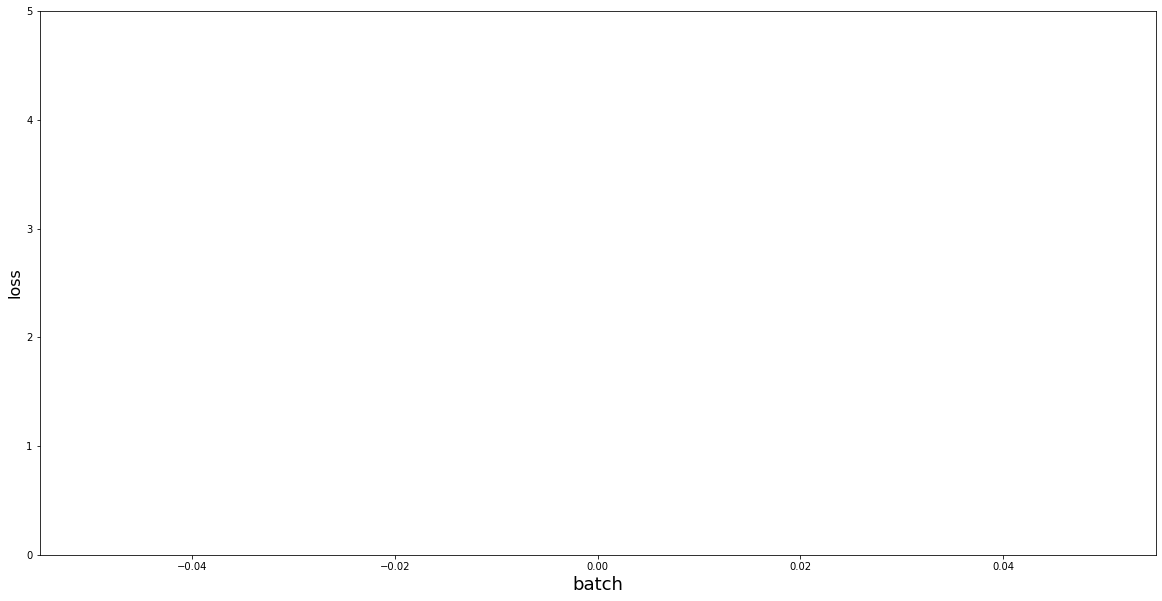

In [37]:
fig = plt.figure(figsize=(20,10))

plt.plot([x[1] for x in gan.g_losses], color='green', linewidth=0.1) #DISCRIM LOSS
# plt.plot([x[2] for x in gan.g_losses], color='orange', linewidth=0.1)
plt.plot([x[3] for x in gan.g_losses], color='blue', linewidth=0.1) #CYCLE LOSS
# plt.plot([x[4] for x in gan.g_losses], color='orange', linewidth=0.25)
plt.plot([x[5] for x in gan.g_losses], color='red', linewidth=0.25) #ID LOSS
# plt.plot([x[6] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.plot([x[0] for x in gan.g_losses], color='black', linewidth=0.25)

# plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.ylim(0, 5)

plt.show()